Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 8: Recognition 

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 18, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Exercise 0: Math recap (Covariance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express?

YOUR ANSWER HERE

**b)** Provide a formula to compute the covariance of two 1-dimensional datasets. How can it be generalized to the $n$-dimensional case?

YOUR ANSWER HERE

**c)** Create and plot two (1-dimensional) datasets with low covariance (use `plt.scatter`). Then do the same for two datasets with high covariance.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE

## Exercise 1: Template Matching Theory [2 points]

**a)** Explain in your own words the idea of *template matching*. Is it a data or model based approach? What are the advantages and disadvantages? In what situations would you apply template matching?

In template matching a 'prototype' of an object is created. Then this prototype is searched in the image. This is a model-based approach, since the search starts with a model which is looked for in the data. \
Advantages:
* Low computational cost
* Easy to implement
* Robust against noise

Disadvantages:
* Does not necessarily work if the object looks slighty different than the model
* The model has to be known and be created accordingly
* The color (or color ratio) has to be correctly implemented into the model. If the scaling of the gray values is off, the matching might not work
* Not robust against rotation

Template matching can be useful to find simple structures, i.e. a circle, rectangle, triangle

**b)** Explain the ideas of *mean absolute difference* and *correlation coefficient*. Name pros and cons.

$\textbf{Mean absolute difference (MAD)}$: \
Measures the mean absolute difference of the gray values from the image and the template for every pixel. \
pro:
* Robust against noise
* Low computational cost

con:
* Not robust against rotation
* Not robust against different gray value scalings
* Template has to have the correct gray values (otherwise worse results)

$\textbf{Correlation coefficient}$: \
Measures with the correlation coefficient of the image and the template, which is the covariance of image and template divided by the product of their standard deviations.\
pro:
* Scaling of gray values does not matter
* Robust against noise

con:
* Higher computational cost
* For bigger templates too high computational cost for direct computation

## Exercise 2: Template Matching Practice: Where is Waldo [2 points]

In the two images `wheresWaldo1.jpg` and `wheresWaldo2.jpg`, Waldo is hiding in the midst of a busy crowd. He always wears the same red and white striped sweater and hat. However, he may be carrying a something that varies from scene to scene. Use template matching with the given Waldo templates (`waldo*.jpg`) to locate Waldo. Highlight
Waldo in the scene and indicate which template was matched.

**Hints:**
* You may use buildin functions to solve this exercise. E.g `skimage.feature.match_template` or `cv2.matchTemplate`
* The images are quite large! You may start by testing your code on a small image patch before applying it to the full scene.
* You may not achieve a perfect match. Analyse the problems you encounter and think how you can improve your result.

The problem is that some of the templates do not look exactly like the Waldos in the image and therefore are not found.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import skimage.feature

waldos = [plt.imread('images/waldo/wheresWaldo{}.jpg'.format(i)) for i in range(1, 3)]
templates = [plt.imread('images/waldo/waldo{}.jpg'.format(i)) for i in range(0, 6)]

plt.figure(figsize = (14, 40))
for i,img in enumerate(waldos):
    plt.subplot(len(waldos),1,i+1)
    plt.imshow(img)
    
plt.figure(figsize = (14, 10))
for i,img in enumerate(templates):
    plt.subplot(1,len(templates),i+1)
    plt.imshow(img)
    
    
# YOUR CODE HERE
for i in range(len(waldos)):
    for j in range(len(templates)):
        image = waldos[i].copy()
        t = templates[j]

        result = cv2.matchTemplate(image, t, cv2.TM_CCOEFF_NORMED)

        best_match = (0,0)
        max_value = 0
        for y in range(result.shape[0]):
            for x in range(result.shape[1]):
                if result[y][x] > max_value:
                    max_value = result[y][x]
                    best_match = (y, x)

        plt.figure(figsize = (14,40))
        plt.gray()
        plt.imshow(result)

        for y in range(t.shape[0]):
            for x in range(t.shape[1]):
                image[best_match[0] + y][best_match[1] + x] = 0

        plt.figure(figsize = (14,40))
        plt.gray()
        plt.imshow(image)

ModuleNotFoundError: No module named 'cv2'

## Exercise 3: Pattern Recognition and PCA [4 points]

**a)** What are the goals of *pattern recognition*? How can they be achieved? What are the problems?

* The goal of pattern recognition is to classify objects by evaluate the signals that are obtained from the image by a sensor
* It can be achieved by first creating and training the classifiers and then classify the pattern to the best fitting class
* Classifying a pattern is a high-dimensional problem and therefore has a high computation cost. Also the classifiers have to be created and trained

**b)** What is *principal component analysis*? How is it related to pattern recognition?

In Principal component analysis (PCA) the pixel spaced is reduced on to a lower-dimensional feature space. The principal components are the $m$ eigenvectors of the covariance matrix with the highest eigenvalues. The data is projected onto the principal components, so that the new representation has a lower dimension. The pattern recognition can be done faster on these reduced dimension.

**c)** Explain how principal components can be computed? Then implement a function that performs the computation.

At first, we take the covariance matrix of the data. From this matrix we compute the eigenvectors. The $m$ eigenvectors with the highest eigenvalues are the principal components.

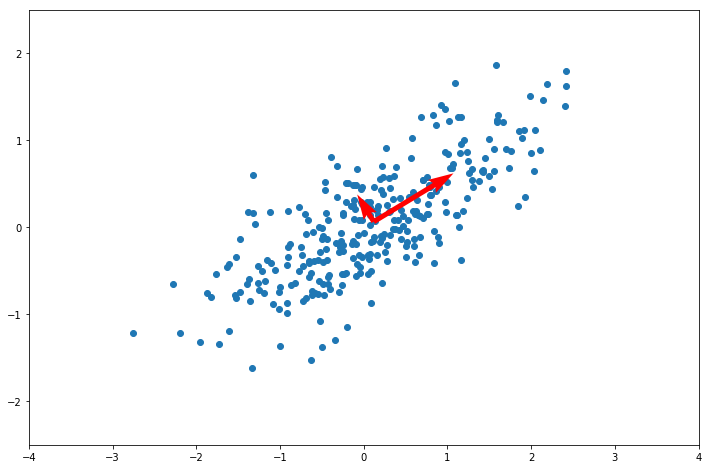

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def mean(data):
    """
    Compute the mean of the given data.
    
    Args:
        data (1d array): An array with the values
        
    Returns:
        mean (float): The mean value of the given data
    """
    return sum(data) / len(data)
    

def pca(data):
    """
    Perform principal component analysis.
    
    Args:
        data (ndarray): an array of shape (n,k),
        meaning n entries with k dimensions
        
    Returns: two arrays
        pc (ndarray): array of shape (k,k) holding the principal components in its columns.
        var (ndarray): k-vector holding the corresponding variances, in descending order.
    """
    
    # Replace the following two lines by your code ...
    pc = np.random.randn(data.shape[1],data.shape[1])
    var = np.random.rand(data.shape[1])
    
    # YOUR CODE HERE
    # Compute the covariance matrix of the data vector
    Cov = np.cov(data.T, bias=False)
    
    # Get the eigenvalues and -vectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(Cov)

    # Assign for the correct output
    pc = eigenvectors
    var = eigenvalues
    
    return pc, var

# generate some random data
np.random.seed(23)
data = np.random.multivariate_normal([0,0], cov = [[1, .55], [.55, .5]], size=300)

# compute the principal components
pc, var = pca(data)
mean = data.mean(axis=0)

# plot the results
plt.figure(figsize=(12,8))
plt.xlim(-4,4)
plt.ylim(-2.5,2.5)
plt.scatter(*data.T)
plt.quiver(*mean[np.newaxis].repeat(2,axis=0).T, *(np.sqrt(var)*pc), color='red', scale=1, scale_units='xy')
plt.show()

# sanity check
#assert np.allclose(var, [1.216, 0.137], rtol=1e-3)

## Exercise 4: Eigenfaces [6 points]

**a)** Import the images from the directory `images/trainimgs` into an numpy array using the function 
`read_images_from_directory` provided in the cell below. Display the images and the corresponding names.

In [4]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_images_from_directory(directory, suffix, shape):
    """
    Read all images found in DIRECTORY with given file
    name SUFFIX. All images should have the same SHAPE,
    specified as (rows,columns).
    
    Args:
        directory (string): Name of input directory.
        suffix (string): File type suffix.
        shape (tuple): Shape of images to be loaded.
    
    Returns:
        images (ndarray): A numpy array of shape m*rows*columns (from shape)
        names (list): A list of corresponding image names.
    """

    # initialize the image array and name list
    #images = np.empty((0, *shape))
    images = np.empty((0, ) + shape)
    names = []

    # now loop through all image files in the directory
    for file_name in glob.glob(directory + os.sep + '*.' + suffix):
        if os.path.isfile(file_name):

            # load each image (as double)
            img = plt.imread(file_name)

            # check for correct size
            if img.shape == shape:
                images = np.append(images, img.reshape((1, ) + shape), axis=0)
                names.append(os.path.basename(file_name))
            else:
                print(
                    'warning: Image "' + file_name +
                    '" with wrong size will be ignored!',
                    file=sys.stderr)

    return images, names


# image file suffix
suffix = 'pgm'

# image size
img_shape = (192, 168)

# YOUR CODE HERE
directory = "images/trainimg"

data = read_images_from_directory(directory, suffix, img_shape)
num_faces = data[0].shape[0]
images = data[0]
names = data[1]


plt.figure(figsize=(19, 16))
plt.gray()
for i in range(images.shape[0]):
    plt.subplot(5,4,i+1); plt.axis('off'); plt.imshow(images[i]); plt.title(names[i])
plt.show()

ModuleNotFoundError: No module named 'cv2'

**b)** Use PCA to compute the eigenfaces (i.e. the eigenvectors of the face images). You may use your PCA function from Exercise 1c or some build in function. Explain what kind of input PCA expects, and how that fits to our images (you may have to `reshape` the images!). Finally, display the eigenfaces.

In [5]:
# YOUR CODE HERE
# PCA expects the input of each image as flatten array
num_imgs = len(images)

data_matrix = np.zeros((num_imgs, img_shape[0] * img_shape[1]))

for i in range(num_imgs):
    data_matrix[i,:] = images[i].flatten()

mean, eigenvectors = cv2.PCACompute(data_matrix, mean=None, maxComponents=num_faces)

eigenfaces = []

for eigenvector in eigenvectors:
    eigenfaces.append(eigenvector.reshape(img_shape))

    
plt.figure(figsize=(19, 16))
plt.gray()
for i in range(num_faces):
    plt.subplot(5,4,i+1); plt.axis('off'); plt.imshow(eigenfaces[i]); plt.title(names[i])
plt.show()

NameError: name 'images' is not defined

**c)** Now project the training face images into the eigenspace to calculate their ”feature vectors”,
i.e. a representation with significantly lower dimension. For the projection of the face images,
they have to be centered first, i.e. the mean face vector has to be subtracted. Store the mean face in some vector (`mean_face`) and the representation achieved in some array (`face_db`). Finally restore the images from `face_db` and display them alongside the original image. Try out the effect of changing the number of eigenfaces to be used (`num_eigenfaces`).

In [6]:
# number of eigenfaces to be used
num_eigenfaces = 19

# Remark: a value of 20 (theoretical perfect reconstruction) may suffer from numerical
# instability (the last eigenface may introduce noise).
# However, a value of 19 suffices for almost perfect reconstruction ...

# YOUR CODE HERE
mean_face = mean.reshape(img_shape)

face_db = np.zeros(data[0].shape)
restored_faces = np.zeros(data[0].shape)

# Subtract the mean from every original face to get the feature vectors
for i in range(num_faces):
    face_db[i] = images[i] - mean_face
print(face_db.shape)
reconstructed_faces = np.zeros(images.shape)

for i in range(num_faces):
    restored_faces[i] = face_db[i]
    recon = mean_face
    
    for j in range(num_eigenfaces):
        weight = np.dot(face_db[j].flatten(), eigenvectors[j])
        recon += (eigenfaces[j] * weight) 
        
    reconstructed_faces[i] = recon
    
plt.figure(figsize=(19, 16))
plt.gray()
for i in range(0, num_faces, 2):
    plt.subplot(5,8,i+1); plt.axis('off'); plt.imshow(images[i]); plt.title("Original")
    plt.subplot(5,8,i+2); plt.axis('off'); plt.imshow(reconstructed_faces[i]); plt.title("Reconstructed")
plt.show()


train_imgs = images
train_names = names
eigenfaces_used = eigenfaces
mean_face = mean_face.flatten()

NameError: name 'img_shape' is not defined

**d)** Understand the function `recognize_face` that recognizes a face from that database by calculating the euclidean distance of this face feature vector to all of the training feature vectors from the database. The feature vector with the smallest distance represents the winner category. Check the implementation by recognizing the images from the training set (they should be recognized without error).

In [7]:
from scipy.spatial.distance import cdist

def recognize_face(face, eigenfaces, mean_face, face_db):
    """
    Recognize a face from a face database.
    and return the index of the best matching database entry.

    The FACE is first centered and projected into the eigeface
    space provided by EIGENFACES. Then the best match is found
    according to the euclidean distance in the eigenface space.
    
    Args:
        face (ndarray): Face to be recognised.
        eigenfaces (ndarray): Array of eigenfaces.
        mean_face (ndarray): Average face.
        face_db (ndarray): Database of faces projectected into Eigenface space.
        
    Returns:
        index (uint): Position of the best matching face in face_db.
    """
    index = -1


    # center the face
    centered = face - mean_face

    # and project it into the eigenface space
    projected = eigenfaces @ centered

    # Now compute the similarity to all known faces
    # (comparison is performed in the eigenface space)
    distances = cdist(face_db, projected[None, :])
    index = distances.argmin()



    return index


# ... and now check the function on the training set ...
def show_recognition_results(imgs, labels, train_imgs, train_labels,
                             num_eigenfaces, eigenfaces, mean_face, face_db):
    """Iterate over all face images and compute the best matching face in face_db.
    
    Args:
        imgs (list): List of test faces.
        train_imgs (list): List of training faces.
        train_labels (list): List of training labels.
        num_eigenfaces (uint): Number of eigenfaces.
        eigenfaces (list): List of the eigenfaces.
        mean_face (ndarray): Average face.
        face_db (ndarray): Database of faces projectected into Eigenface space.
        
    Returns:
    
    """
    
    img_shape = imgs[0].shape
    plt.figure(figsize=(12, 12))
    plt.suptitle(
        'Face recognition based on {} principal components'.format(num_eigenfaces))
    plt.gray()
    for j, img in enumerate(imgs):

        # find the best match in the eigenface database
        winner = recognize_face(
            img.reshape(np.prod(img_shape)), eigenfaces, mean_face, face_db)
        name_label = labels[j][5:7]
        name_winner = train_labels[winner][5:7]

        plt.subplot(5, 8, 2 * j + 1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(labels[j][5:7])

        plt.subplot(5, 8, 2 * j + 2)
        plt.axis('off')
        plt.imshow(train_imgs[winner])
        t = plt.title(('*' if name_label != name_winner else '') + name_winner)
        plt.setp(t, color='r' if name_label != name_winner else 'g') 
    plt.show()
    
show_recognition_results(train_imgs, train_names,
                         train_imgs, train_names,
                         num_eigenfaces, eigenfaces_used, 
                         mean_face, face_db)


NameError: name 'train_imgs' is not defined

**e)** Now classify the images in directory `images/testimg/`. Try to reduce the number of principal components
used. How many PCs are necessary to still achieve perfect classification?

In [8]:
test_imgs, test_names = read_images_from_directory('images/testimg', suffix,
                                                   img_shape)

# YOUR CODE HERE
show_recognition_results(test_imgs, test_names, 
                         train_imgs, train_names, 
                         num_eigenfaces, eigenfaces_used, 
                         mean_face, face_db)

NameError: name 'read_images_from_directory' is not defined

## Exercise 5: Understanding the Wireframe-Model [5 points]

This exercise addresses the matching procedure described on (CV-12 Model Based Recognition slides 9-17)

**a)** Explain in your own words the functions on slide  (CV-12 slide 9). Also explain when and why it may make sense to use $m$ instead of $m'$.


* $g(x,y)$ is the value of the pixel $p$ at position $(x,y)$\
* $\Delta_xg = g(x+1, y) - g(x-1,y)$ describes the difference of the values of the pixels right and left from $p$.
* $\Delta_yg = g(x, y+1) - g(x,y-1)$ describes the difference of the values of the pixels above and below $p$.
* $m'(x,y) = \sqrt{(\Delta_xg^2 + \Delta_yg^2)}$ is a distance function. It describes the length (?) of the gradient.
* $\beta(x,y) = \arctan(\Delta_yg / \Delta_xg)$ is the orientation (the angle) of the gradient.
* $m(x,y) = \Theta(m'(x,y)-T)$ is $0$ for all $m'(x,y) < 0$, otherwise $1$, so the function only takes gradients with a length $> T$ into account

**b)** Explain the fitness score $E_{si}$ and $E_l$. What do the arrows (CV-12 slide 11), e.g. $\beta_j$ and $S_j$, indicate? What is the idea of $G(d)$?

The parameters are adapted such that the wire-frame matches the gray value edges. The degree of matching is given by the "fitness score" $E_{S_i}$. <br>
Every pixel contributes a "fitness score" to the "total fitness score" $E_l$ of a line segment. <br>

The arrows in the image in CV-12 slide 11 show graphically the contribution of the fitness score of some pixels for a line segment as vectors. Here, e.g. $S_j$ is the contribution to the fitness score of Pixel $S_j$. It is derived from the gradient (perpendicular to the line segment) with the use of the angle of the gradient $\beta_j$ and weighted by a distance $d_i$. The weight is given by a gaussian distribution with mean of zero and sigma equal to $w$, which is half the width of the rectangle R. The idea of the Gaussian $G(d)$ is to make the pixels closer to the line segment have a higher impact in the resulting "total fitness score".

**c)** Explain the goal of EDA (Estimation of Distribution Algorithm) and how it is performed in the context of the matching procedure.

EDA is an evolutionary computation to optimize the shape, position and pose parameters. An individual, a point in the 15D parameter space, is initialized within a box in parameter space around the estimated position of the object. For each individual a fitness score is calculated. Afterwards, individuals with a high fitness score are chosen to compute new individuals for the next generation. This is repeated until an achieved improvement is below a threshold.

## Exercise 6: Histogram of Oriented Gradients (HOG) [3 points]

The *Histogram of Oriented Gradients (HOG)* applied in the initial step of the wireframe matching procedure is also applied in other computer vision algorithms, especially in the context of object recognition. This exercise will examine this tool in a bit more detail.

**a)** Explain the idea of the histogram of oriented gradients. How can it be applied to analyze images? Think how this idea may be used to recognize objects?

HOG is used to find objects in an image with the use of bounding boxes. The bounding box is split into 8x8 cells and 4 of these cells construct a block. In every cell the gradient angle and magnitude is calculated and put into bins of a histogram. The result is a vector of 9 parameters, given by the 9 bins of the histogram. Later on, the 4 histograms of an entire block are concatenated and give a 36d-vector. <br>
Beside some normalization steps, basically every vector of a block is concatenated. This high dimensional vector is then used to run a binary classifier (e.g. SVM) to classify between the object you are searching for and the non-object.

**b)** The Scikit-image library provides the function [`hog`](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) that can compute histograms of oriented gradients and offers also an option to construct a visualization. Run the following code cell and then describe your observations in the text cell below:

<IPython.core.display.Javascript object>


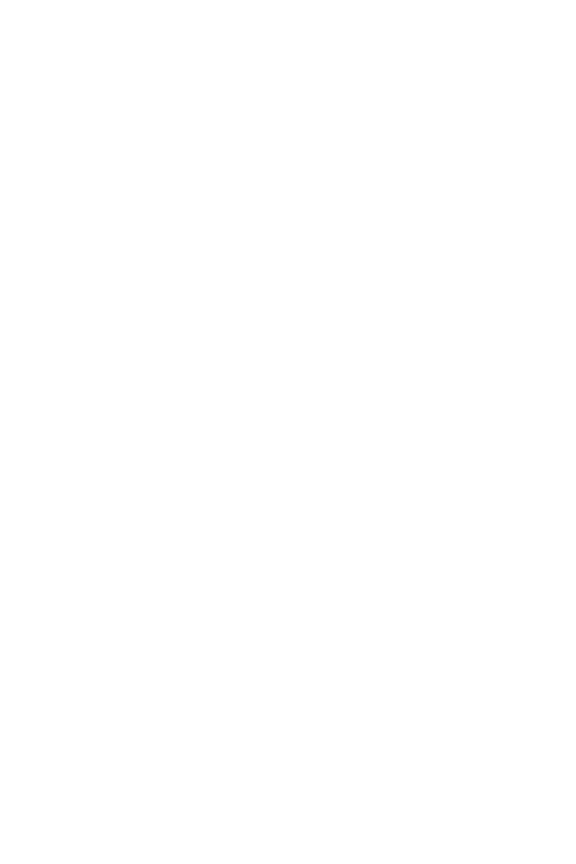

<IPython.core.display.Javascript object>


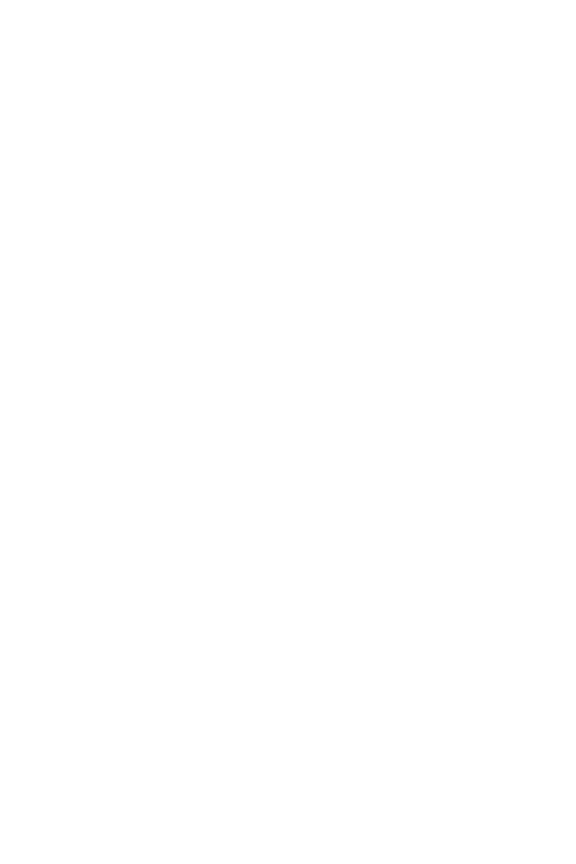

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import resize
import numpy as np
import imageio

image = imageio.imread('./images/truck.jpeg')
image = resize(image,(700,1000),preserve_range=True).astype(np.uint8)

fd, hog_image = hog(image,feature_vector=False,visualize=True, multichannel=True)
#multichannel is depcricated starting from skimage 0.19.0, use channel_axis instead
#fd, hog_image = hog(image,feature_vector=False,visualize=True, channel_axis=2)

# Display the result
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 12))

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

bars = ax3.bar(np.linspace(0,180,fd.shape[-1]),fd[0,0,0,0],width=(180/fd.shape[-1]))

plt.tight_layout()
plt.show()

def on_press(event):
    """Mouse button press event handler
    Args:
    event: The mouse event
    """
    x, y = int(event.xdata)//8, int(event.ydata)//8
    
    cell_x = x - fd.shape[1] if x >= fd.shape[1] else 0
    x = min(x,fd.shape[1]-1)
    cell_y = y - fd.shape[0] if y >= fd.shape[0] else 0
    y = min(y,fd.shape[0]-1)
    ax3.clear()
    ax3.set_title(f"x={x} [{cell_x}], y={y} [{cell_y}], {fd.shape}")
    ax3.bar(np.linspace(0,180,fd.shape[-1]),fd[y,x,cell_y,cell_x],width=(180/fd.shape[-1]))
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', on_press)

The HOG classifies the object but has troubles to get rid of the street below the object which appears due to the high gradient of the street. One can also see that regions with almost no gradient (like the sky) are completely cut off due to the threshold cut off of magnitudes in the HOG-algorithm. 

**c)** Implement your own version of the histogram of oriented gradients function. You may proceed in the following steps:
1. Compute the gradient image and determine magnitude and direction of gradients.
2. Divide the image into cells and compute a weighted histogram for each cell.
3. Use the function to [`plt.quiver`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html) to display your results (already implemented).

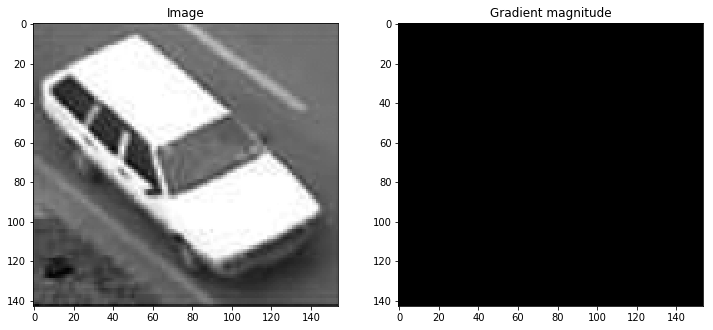

In [10]:
# Step 1: compute gradients

%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


def image_gradients(image):
    """Compute graident magnitudes and directions for a given image.
    
    Input:
        image: an numpy.ndarray of shape (HEIGHT, WIDTH)
    Result:
        magnitude, direction: two numpy.ndarrays of the same shape as image,
        holding gradient magnitudes and directions, respectively.
    """
    # Hint: you may ues the sobel function to obtain x- and y- gradients
    magnitude = np.zeros_like(image, dtype=np.float32)
    direction = np.zeros_like(image, dtype=np.float32)
    # YOUR CODE HERE
    return magnitude, direction

image = rgb2gray(imageio.imread('./images/car.png').astype(np.uint8))
magnitude, direction = image_gradients(image)

plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1); plt.title("Image")
plt.imshow(image)
plt.subplot(1,2,2); plt.title("Gradient magnitude")
plt.imshow(magnitude)
plt.show()

In [11]:
# Step 2: compute the histograms

def histogram_of_oriented_gradients(image, cell_size=(16,16), bins=9):
    """Compute histograms of oriented gradients for an image.
    Input:
        image: image: an numpy.ndarray of shape (HEIGHT, WIDTH)
        cell_size: the size of individual cells into which the image is divided
        bins: the number of bins per histogram
    Result:
        An np.ndarray of shape (CELL_ROWS, CELL_COLUMNS, BINS) containing
        the histograms for the individual cells
    """
    # Hint: you may use np.histogram() here
    rows, columns = image.shape[0]//cell_size[0], image.shape[1]//cell_size[1]
    hog = np.zeros((rows, columns, bins))
    magnitude, direction = image_gradients(image)
    # YOUR CODE HERE
    return hog

hog = histogram_of_oriented_gradients(image)

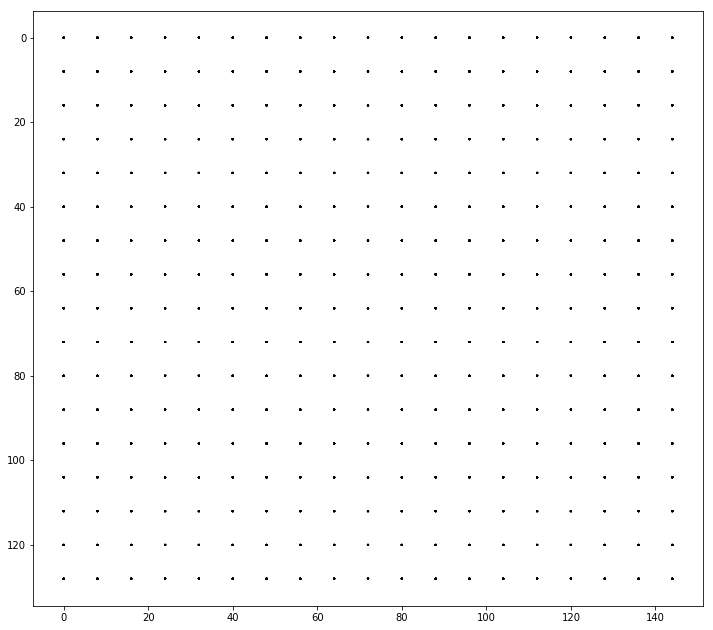

In [12]:
# Step 3: display your results

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cell_size=(8,8)
hog = histogram_of_oriented_gradients(image, cell_size=cell_size)

plt.figure(figsize=(12,12))
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

y, x = np.arange(hog.shape[0])*cell_size[0], np.arange(hog.shape[1])*cell_size[1]
for angle in range(hog.shape[-1]):
    rad = angle * np.pi / hog.shape[-1]
    u = hog[:,:,angle] * np.sin(rad)
    v = hog[:,:,angle] * np.cos(rad)
    plt.quiver(x,y,u,v,scale=200.)
    plt.quiver(x,y,-u,-v,scale=200.)

plt.show()